<a href="https://colab.research.google.com/github/sanskruti-1234/ML/blob/main/Practical_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
try:
    df = pd.read_csv('Walmart_Sales.csv')
except FileNotFoundError:
    print("Error: CSV file not found. Please check the file path.")
    exit()

In [3]:
print(df.head())
print(df.info())
print(df.describe())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   i

In [4]:
df.dropna(inplace=True)

In [13]:
features = ['Weekly_Sales', 'Temperature', 'Unemployment']
target = 'CPI'

In [14]:
numerical_features = df[features].select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [15]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

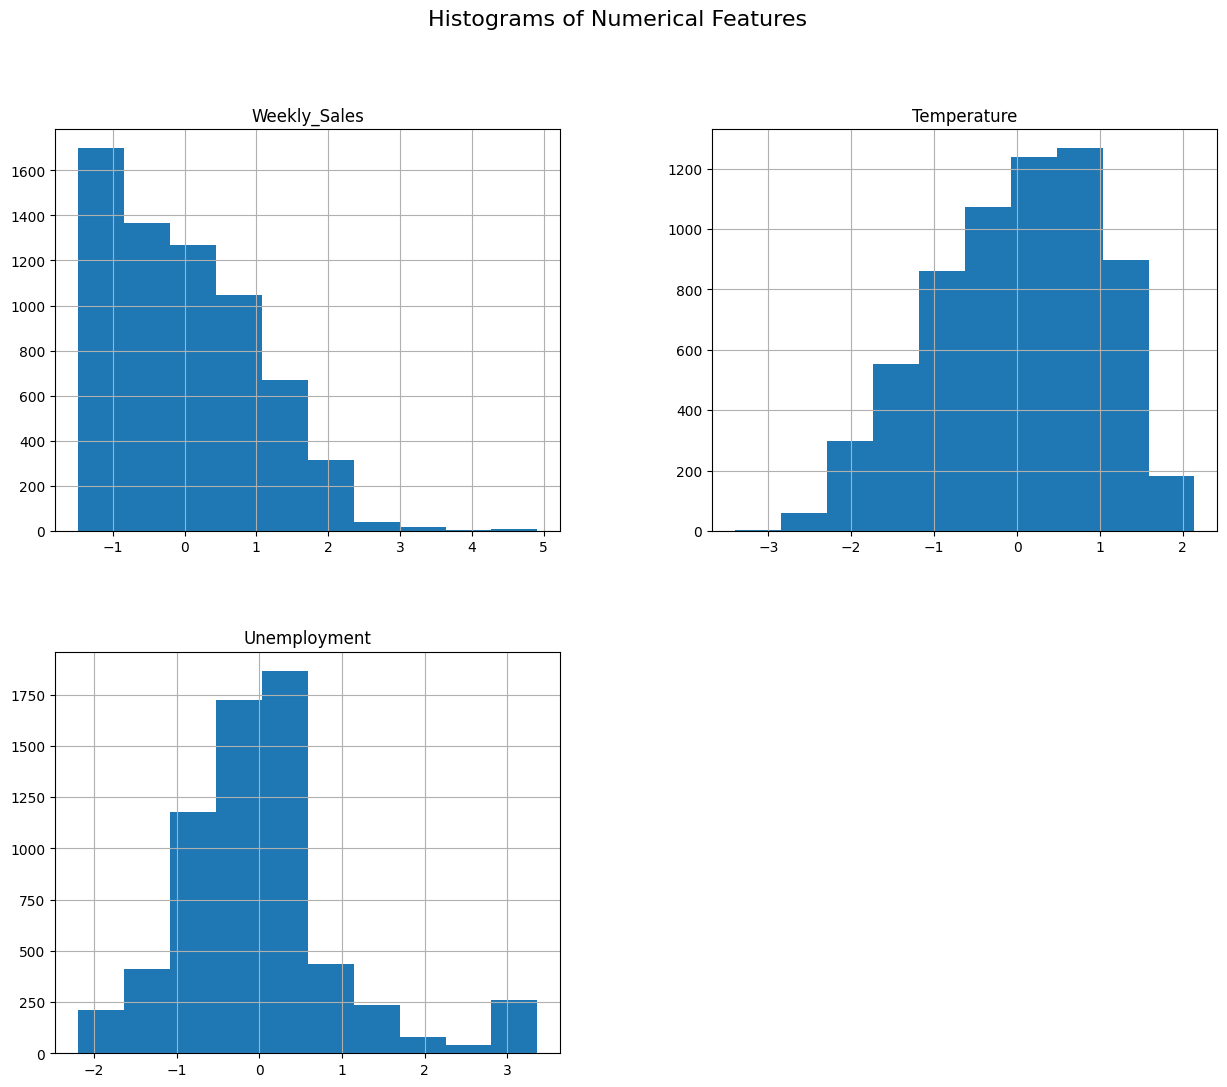

In [16]:
df[numerical_features].hist(figsize=(15, 12))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

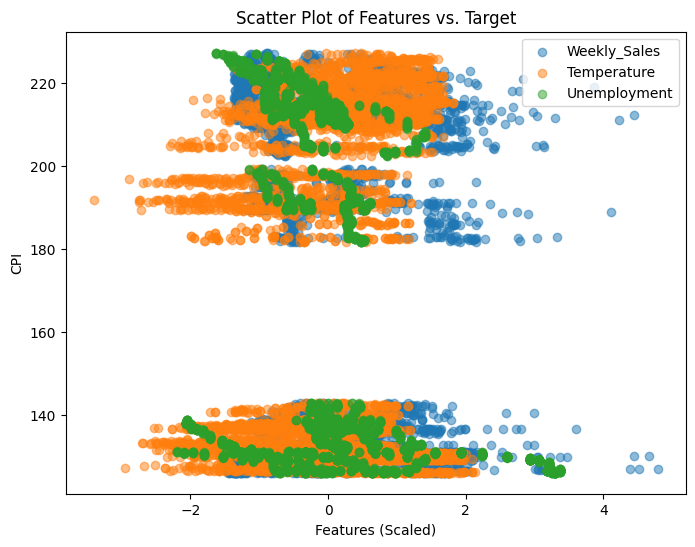

In [17]:
plt.figure(figsize=(8, 6))
for feature in numerical_features:
    plt.scatter(X_train[feature], y_train, label=feature, alpha=0.5)
plt.xlabel("Features (Scaled)")
plt.ylabel(target)
plt.title("Scatter Plot of Features vs. Target")
plt.legend()
plt.show()

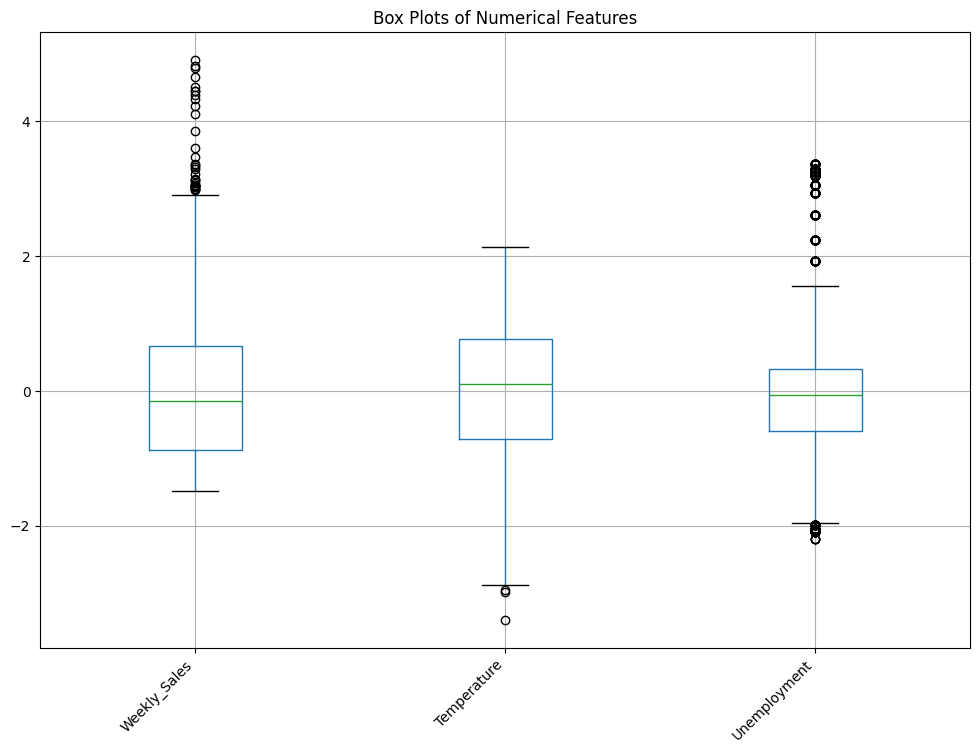

In [19]:
plt.figure(figsize=(12, 8))
df.boxplot(column=numerical_features)
plt.xticks(rotation=45, ha='right')
plt.title("Box Plots of Numerical Features")
plt.show()

